# Telecom Data Analysis
In this project, I performed a comprehensive analysis of data from a telecommunications company to gain insights into customer churn behavior. The project follows a structured approach involving various phases including data collection, preparation, processing, analysis, and visualization. The aim is to extract meaningful insights that can aid in making data-driven decisions to reduce churn and improve customer retention.


# Ask 
Some of the questions we aim to answer in this project include:

- What factors contribute to customer churn in the telecom industry?

- Can we identify patterns or trends in customer behavior that precede churn events?

- Which customer segments are most prone to churning?

- Are there specific services or contract types that correlate with higher churn rates?

- How can the company leverage this analysis to reduce churn and improve customer satisfaction?

# Collect
In the Collect phase, I gathered the necessary data from the telecommunications company's website. I utilized Python libraries such as pandas and seaborn to import, manipulate, and visualize the data. The dataset typically includes various features such as customer demographics, service usage, contract details, and churn status.

In [24]:
import matplotlib
import numpy as edaNp
import pandas as edaPd
import seaborn as sns
import matplotlib.ticker as edaTick
import matplotlib.pyplot as edaPlt
import warnings
warnings.filterwarnings("ignore")

edaData = edaPd.read_csv("C:/Users/mubas/Downloads/rawChurn.csv")

# Prepare 
In this phase data is sorted and made ready for process that is next phase of the project. 

In [16]:
print(edaData.head(5))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [17]:
print(edaData.shape)

print(edaData.columns.values)

# Checking the data types of all the columns
print(edaData.dtypes)

# Check the descriptive statistics of numeric variables
print(edaData.describe())

(7043, 21)
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.00

SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

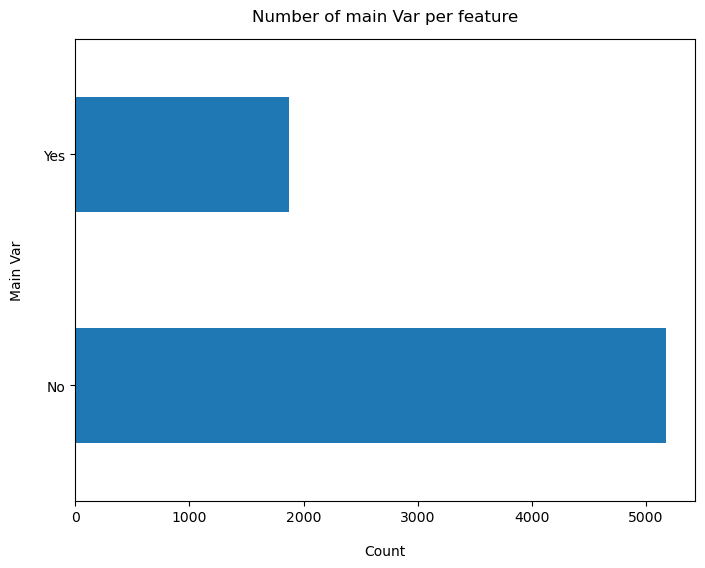

In [18]:
edaData['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
edaPlt.xlabel("Count", labelpad=14)
edaPlt.ylabel("Main Var", labelpad=14)
edaPlt.title("Number of main Var per feature", y=1.02)
edaPlt.show()

In [21]:
100*edaData['Churn'].value_counts()/len(edaData['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [22]:
print(edaData['Churn'].value_counts())


No     5174
Yes    1869
Name: Churn, dtype: int64


Data is highly imbalanced, ratio = 73:27
So we analyse the data with other features while taking the target values separately to get some insights.

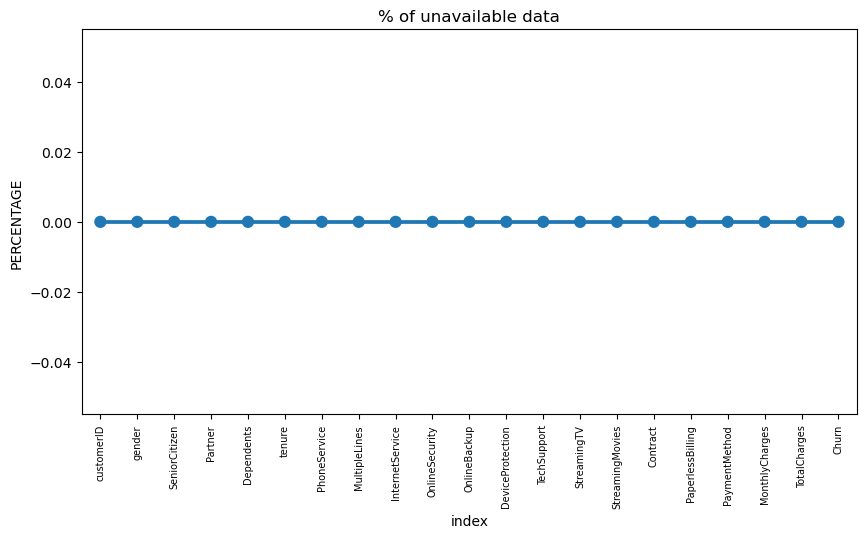

In [26]:
missing = edaPd.DataFrame((edaData.isnull().sum())*100/edaData.shape[0]).reset_index()
edaPlt.figure(figsize=(10,5))
ax = edaSns.pointplot('index',0,data=missing)
edaPlt.xticks(rotation =90,fontsize =7)
edaPlt.title("% of unavailable data")
edaPlt.ylabel("PERCENTAGE")
edaPlt.show()

Missing Data - Initial Intuition

Here, we don't have any missing data.

General Thumb Rules:

For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.

For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.

As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values.

But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

# Data Cleaning 
In this phase data is made ready to analyse. It is made sure that there are no anomalies, discrepencies, missing values, outliers and duplicate values in the dataset. These problems are addressed effectively before actual implementation of analyse phase.

In [28]:
edaCopiedData = edaData.copy()

In [29]:
edaCopiedData.TotalCharges = edaPd.to_numeric(edaCopiedData.TotalCharges, errors='coerce')
print(edaCopiedData.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [30]:
print(edaCopiedData.loc[edaCopiedData ['TotalCharges'].isnull() == True])


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [32]:
#Removing missing values 
edaData.dropna(how = 'any', inplace = True)

Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [33]:
# Getting maximum value of tenure
print(edaCopiedData['tenure'].max())

72


In [36]:
# Grouping the feature "tenure" on the basis of twelve months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
edaCopiedData['tenure_group'] = edaPd.cut(edaCopiedData.tenure, range(1, 80, 12), right=False, labels=labels)
print(edaCopiedData['tenure_group'].value_counts())

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64


In [38]:
# deleting features(custId and tenure)
edaCopiedData.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
print(edaCopiedData.head())

   gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling

# Analyze
The Analyze phase is the core of the project, where I delvee deep into the data to uncover patterns, relationships, and insights. I conducted uni-variate and bi-variate analysis to explore the impact of individual features on churn rates and identify correlations between different variables. 

# Univariate Analysis

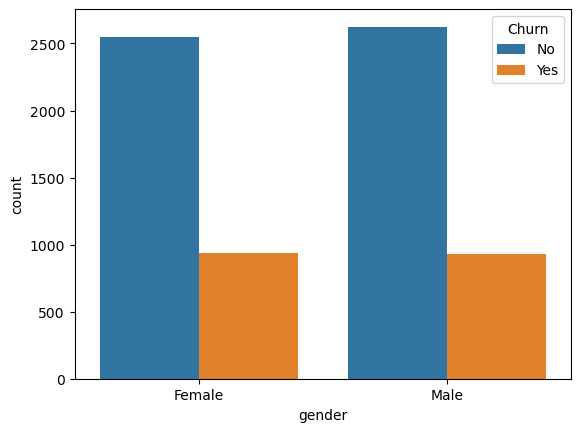

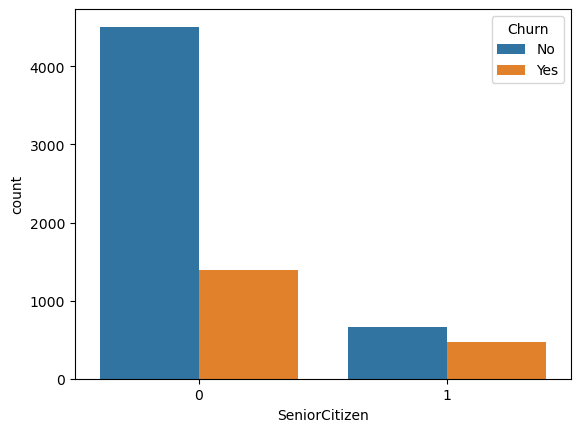

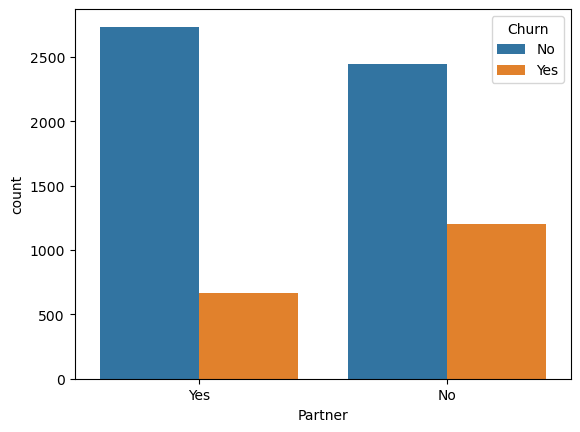

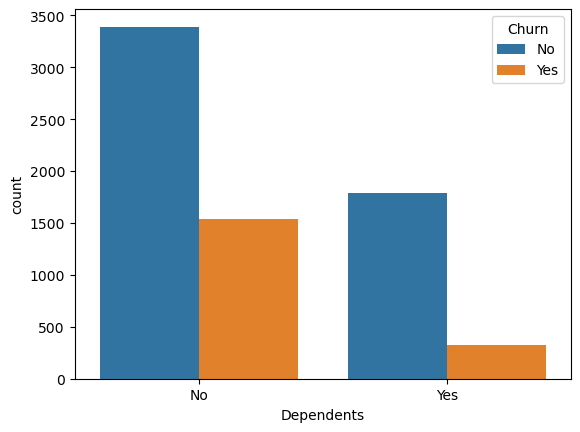

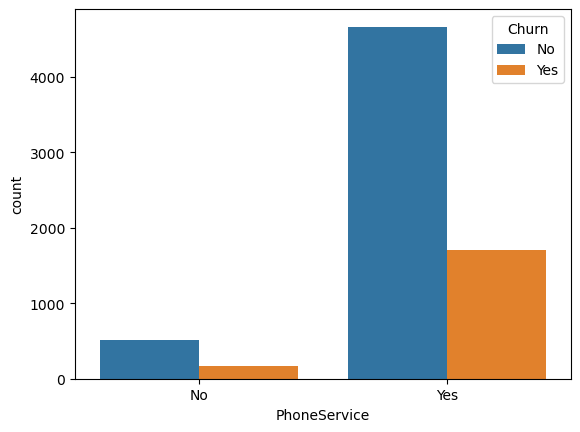

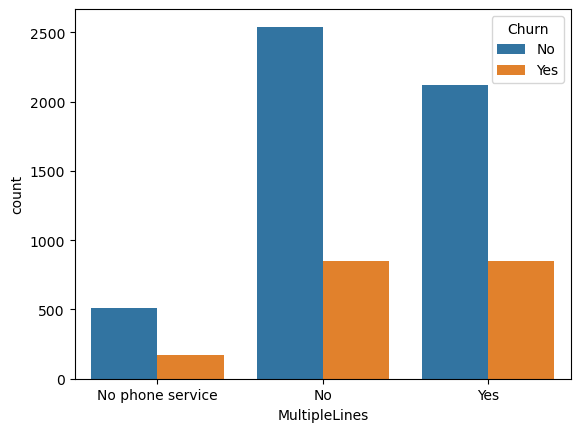

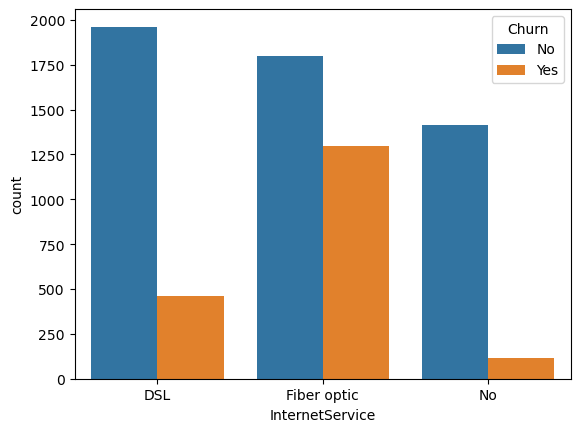

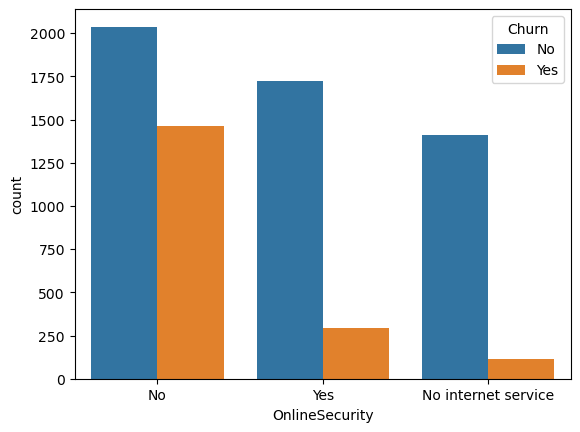

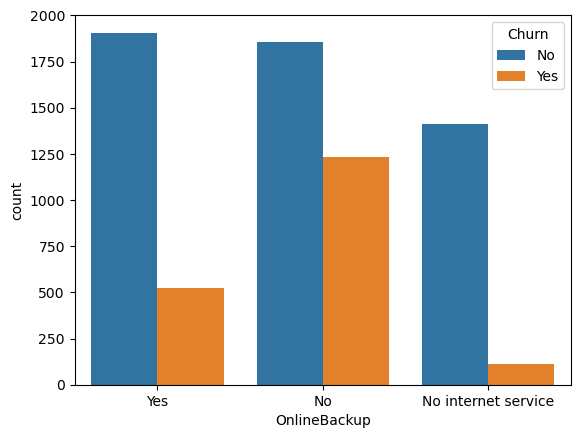

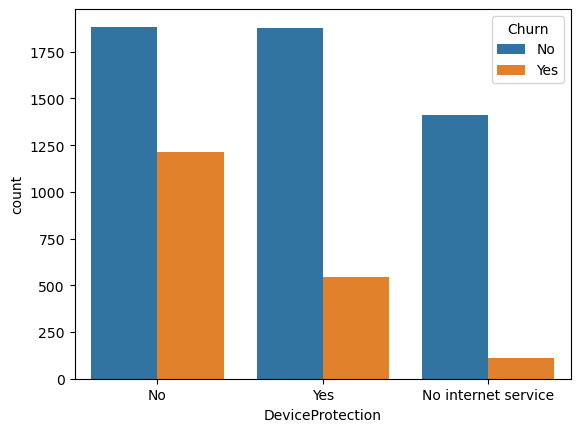

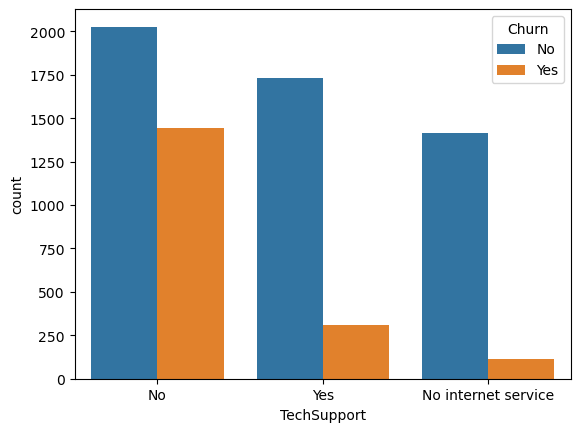

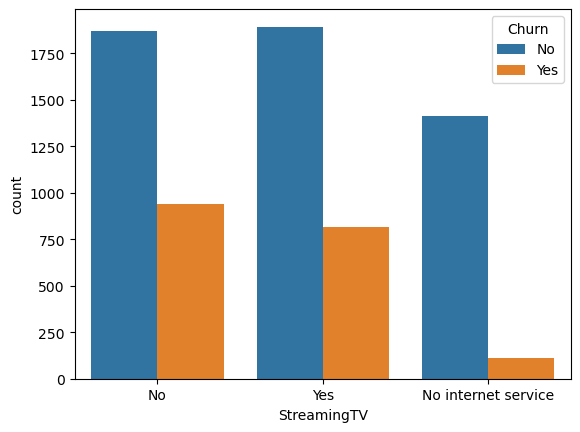

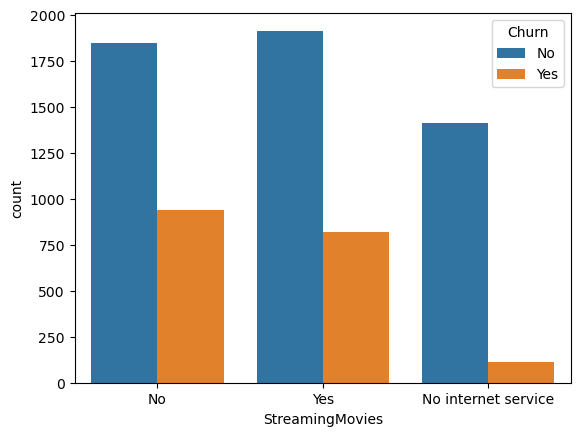

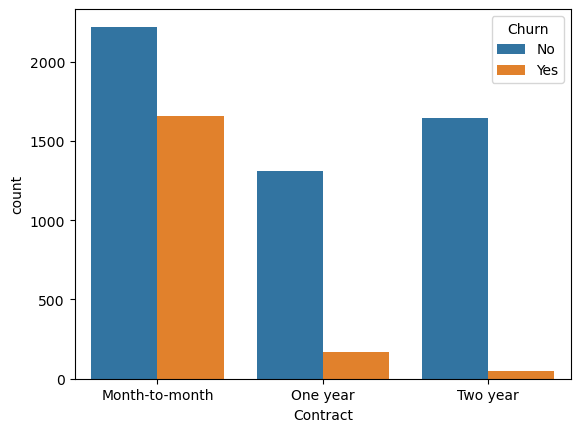

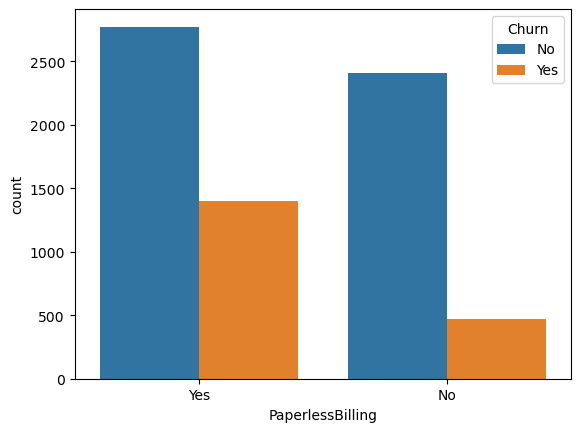

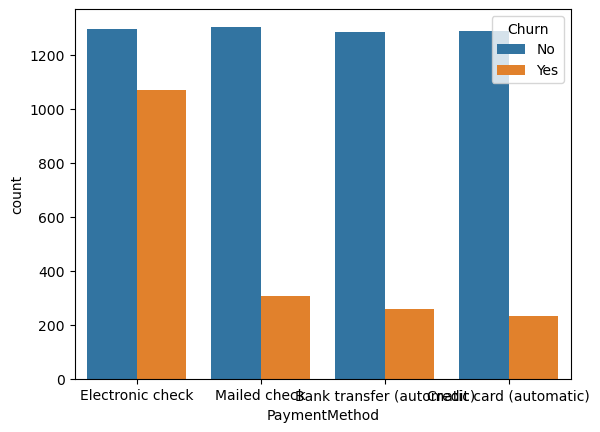

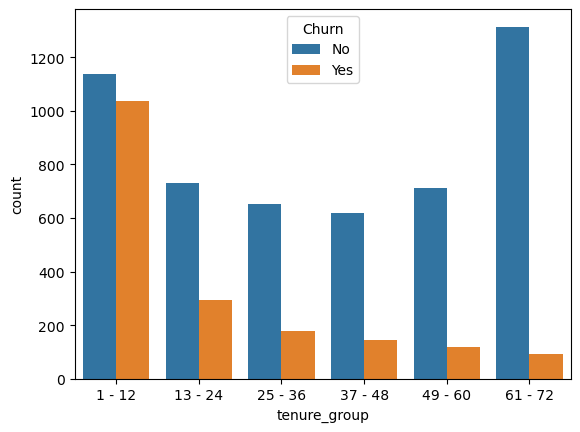

In [39]:
 for j, predictor in enumerate(edaCopiedData.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
     edaPlt.figure(j)
     edaSns.countplot(data=edaCopiedData, x=predictor, hue='Churn')
     edaPlt.show(
    

 Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [40]:
edaCopiedData['Churn'] = edaNp.where(edaCopiedData.Churn == 'Yes',1,0)
print(edaCopiedData.head())

   gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling

In [41]:
edaCopiedDataDummies = edaPd.get_dummies(edaCopiedData)
print(edaCopiedDataDummies.head())

   SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0           29.85         29.85      0              1   
1              0           56.95       1889.50      0              0   
2              0           53.85        108.15      1              0   
3              0           42.30       1840.75      0              0   
4              0           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0            0           0            1              1               0  ...   
1            1           1            0              1               0  ...   
2            1           1            0              1               0  ...   
3            1           1            0              1               0  ...   
4            0           1            0              1               0  ...   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   


Relationship between Monthly Charges and Total Charges

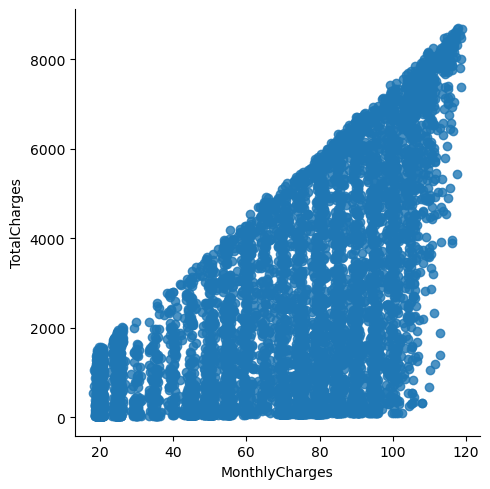

In [42]:
edaSns.lmplot(data=edaCopiedDataDummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

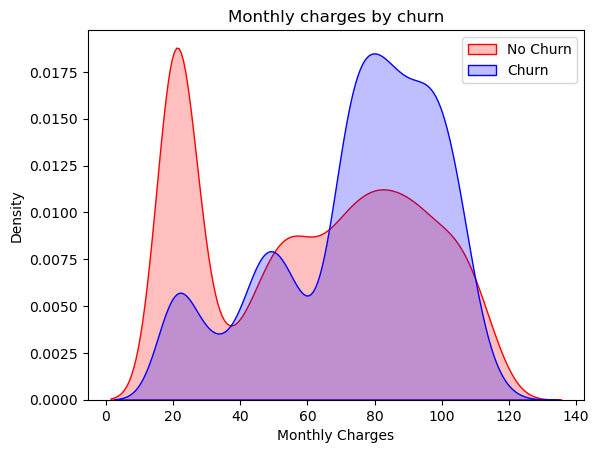

In [43]:
Mth = edaSns.kdeplot(edaCopiedDataDummies.MonthlyCharges[(edaCopiedDataDummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = edaSns.kdeplot(edaCopiedDataDummies.MonthlyCharges[(edaCopiedDataDummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Insight: Churn is high when Monthly Charges ar high

Text(0.5, 1.0, 'Total charges by churn')

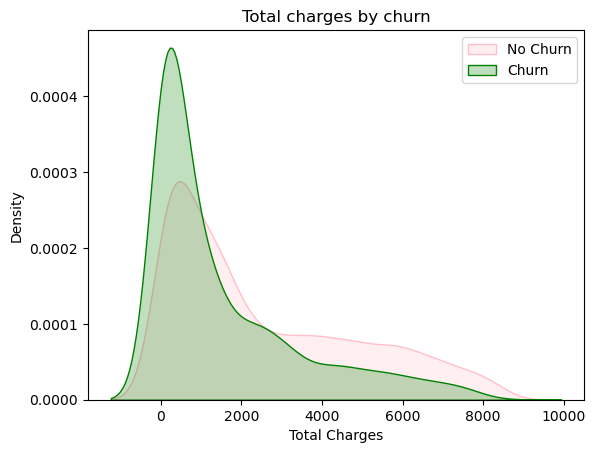

In [44]:
Tot = edaSns.kdeplot(edaCopiedDataDummies.TotalCharges[(edaCopiedDataDummies["Churn"] == 0) ],
                color="Pink", shade = True)
Tot = edaSns.kdeplot(edaCopiedDataDummies.TotalCharges[(edaCopiedDataDummies["Churn"] == 1) ],
                ax =Tot, color="Green", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

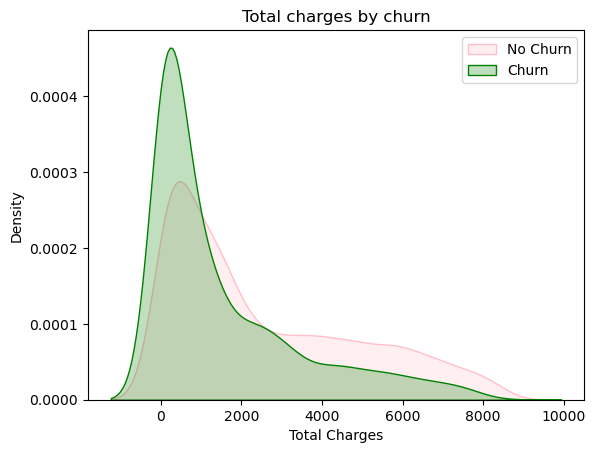

In [45]:
Tot = edaSns.kdeplot(edaCopiedDataDummies.TotalCharges[(edaCopiedDataDummies["Churn"] == 0) ],
                color="Pink", shade = True)
Tot = edaSns.kdeplot(edaCopiedDataDummies.TotalCharges[(edaCopiedDataDummies["Churn"] == 1) ],
                ax =Tot, color="Green", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Surprising insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

Build a corelation of all predictors with 'Churn' 

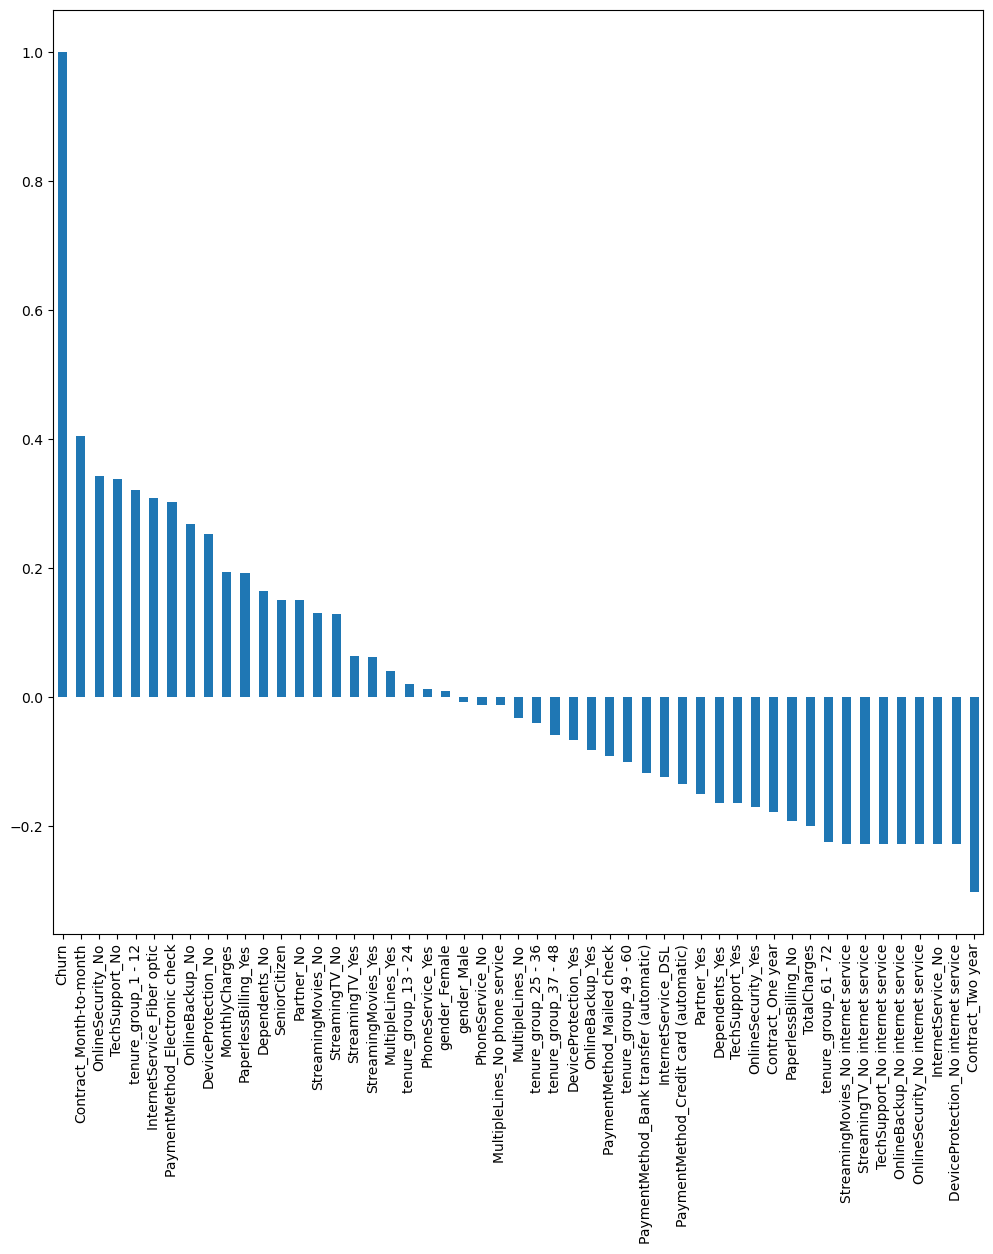

In [49]:
edaPlt.figure(figsize=(12,12))
edaCopiedDataDummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
edaPlt.show()

**Derived Insight: **

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

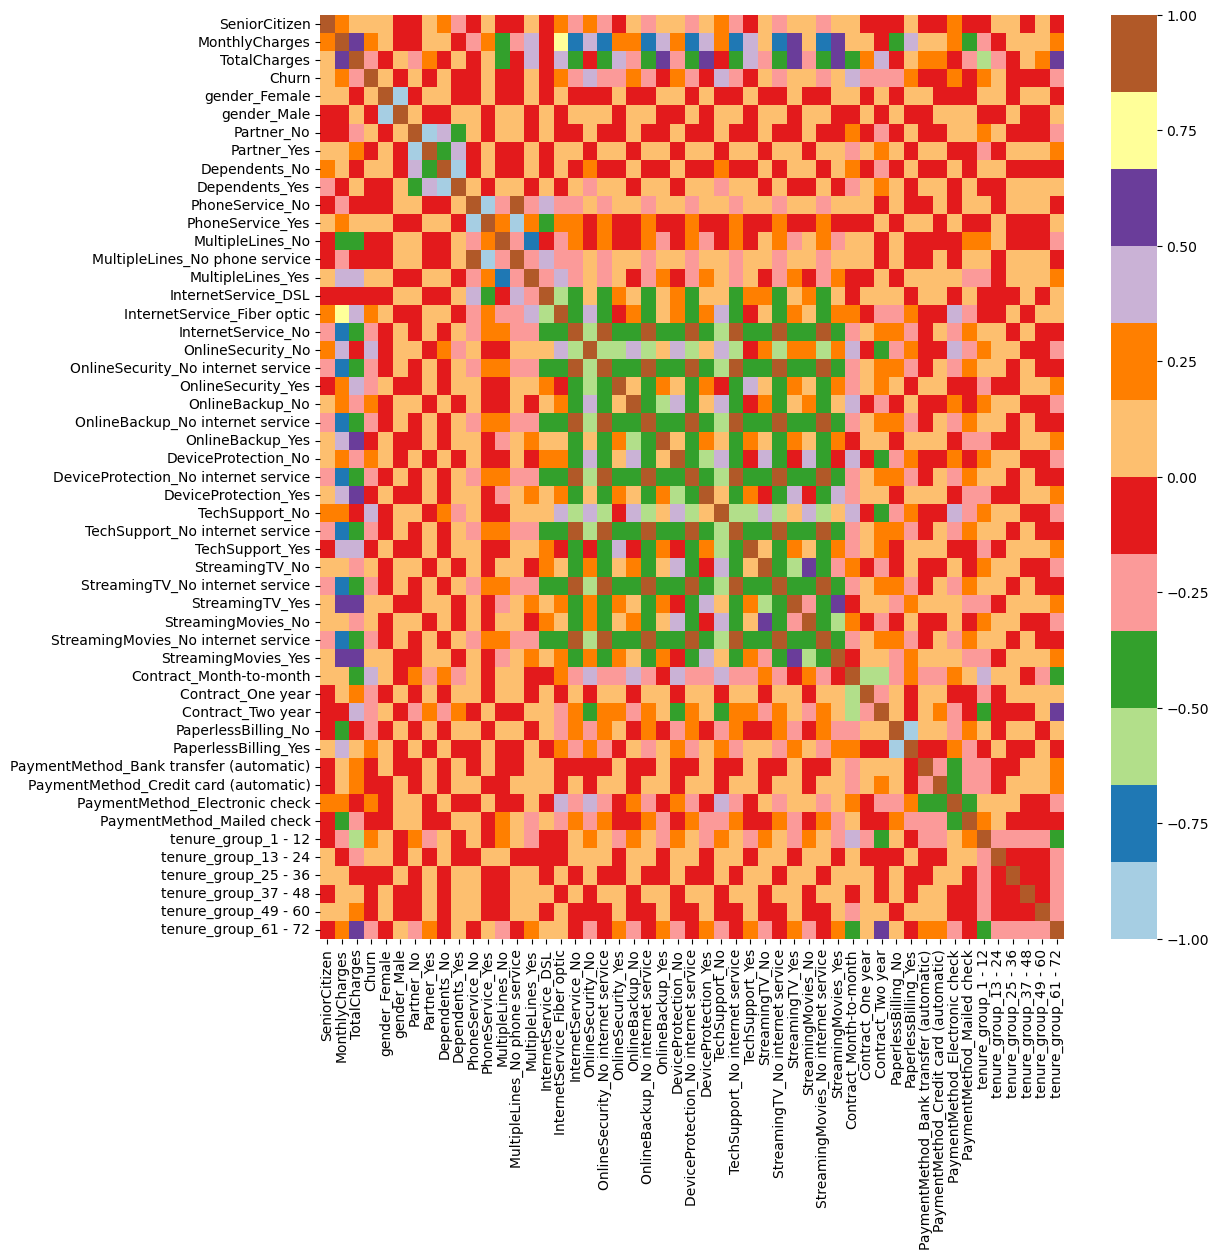

In [50]:
edaPlt.figure(figsize=(12,12))
edaSns.heatmap(edaCopiedDataDummies.corr(), cmap="Paired")
edaPlt.show()

# Bivariate Analysis

In [62]:
edaTarget0=edaCopiedData.loc[edaCopiedData["Churn"]==0]
edaTarget1=edaCopiedData.loc[edaCopiedData["Churn"]==1]

In [79]:
import seaborn as sns;
def uniplot(df,col,title,hue =None):
    
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()
    
    uniplot(edaTarget1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

    uniplot(edaTarget0, col='Partner', title='Distribution of Gender for Non Churned Customers', hue='gender')

    uniplot(edaTarget1, col='PaymentMethod', title='Distribution of PaymentMethod for Churned Customers',
            hue='gender')

    uniplot(edaTarget1, col='Contract', title='Distribution of Contract for Churned Customers', hue='gender')

    uniplot(edaTarget0, col='TechSupport', title='Distribution of TechSupport for Churned Customers', hue='gender')

    uniplot(edaTarget1, col='SeniorCitizen', title='Distribution of SeniorCitizen for Churned Customers',
            hue='gender')

edaCopiedDataDummies.to_csv('tel_churn2.csv')

In [ ]:
uniplot(edaTarget1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

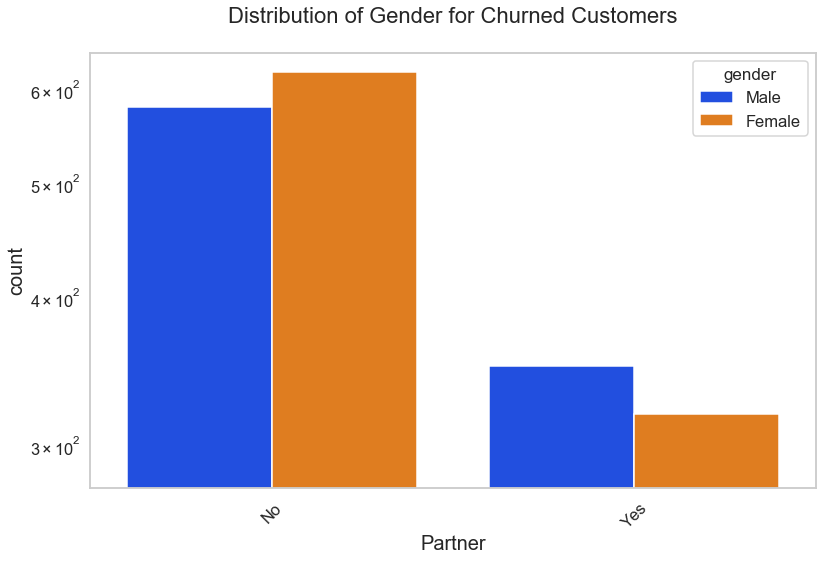

In [ ]:
uniplot(edaTarget0, col='Partner', title='Distribution of Gender for Non Churned Customers', hue='gender')

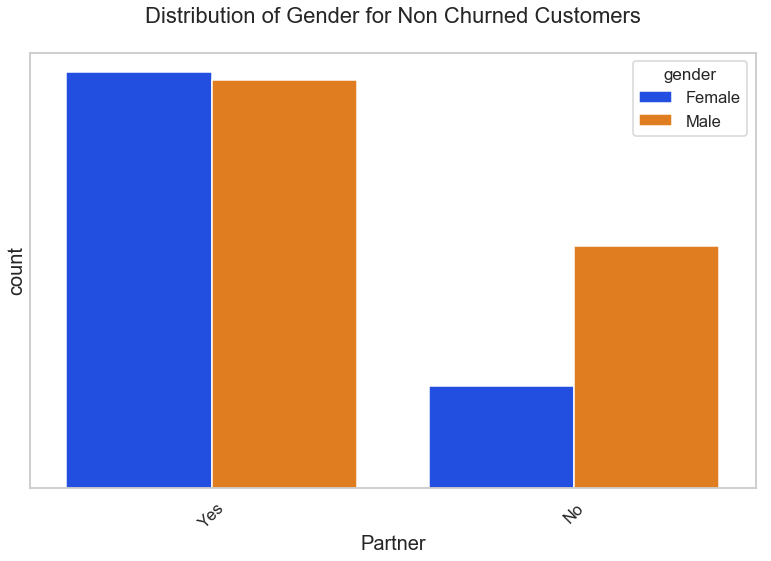

In [ ]:
  uniplot(edaTarget1, col='PaymentMethod', title='Distribution of PaymentMethod for Churned Customers',hue='gender')


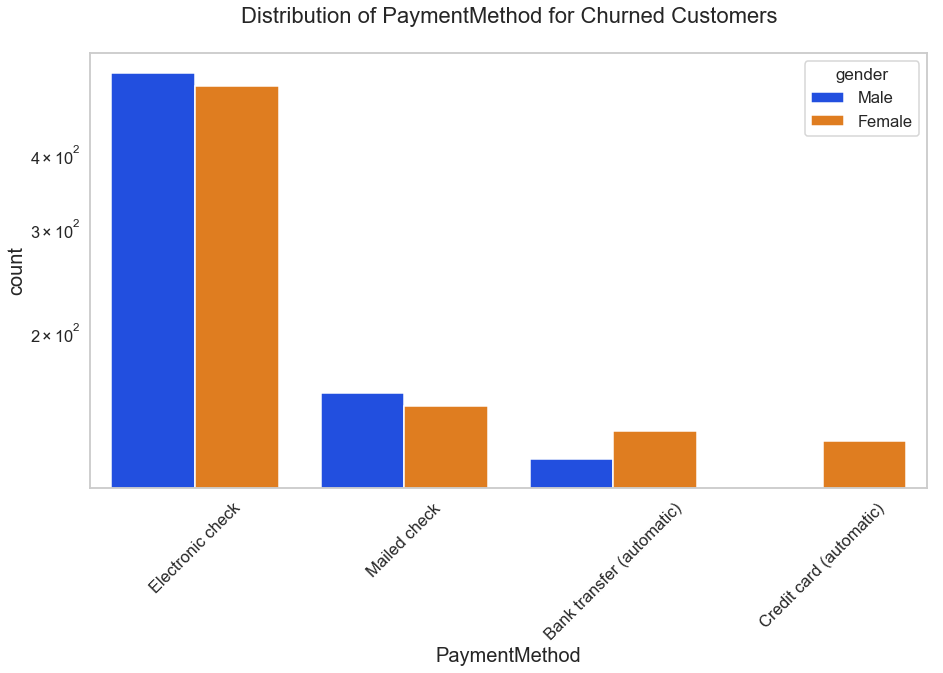

In [ ]:
uniplot(edaTarget1, col='Contract', title='Distribution of Contract for Churned Customers', hue='gender')

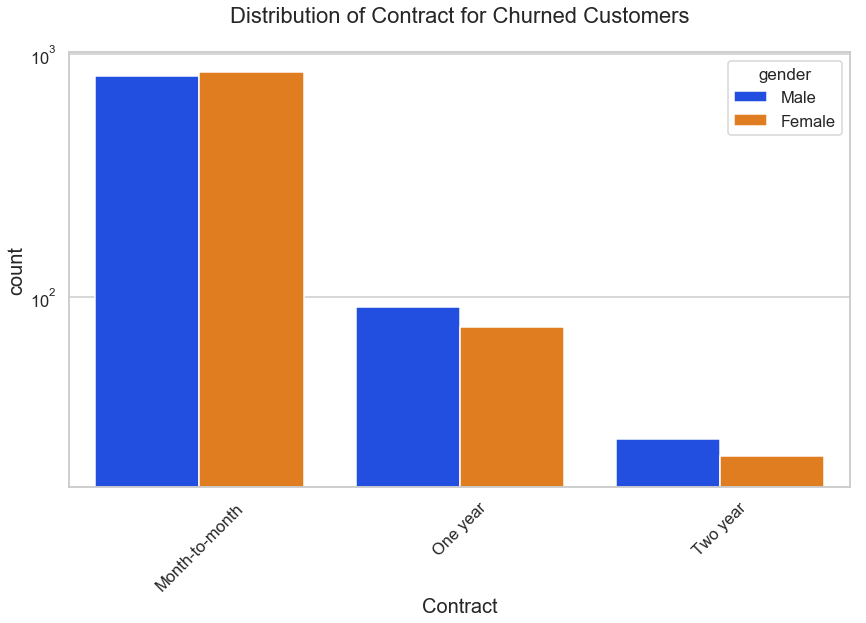

In [ ]:
uniplot(edaTarget0, col='TechSupport', title='Distribution of TechSupport for Churned Customers', hue='gender')

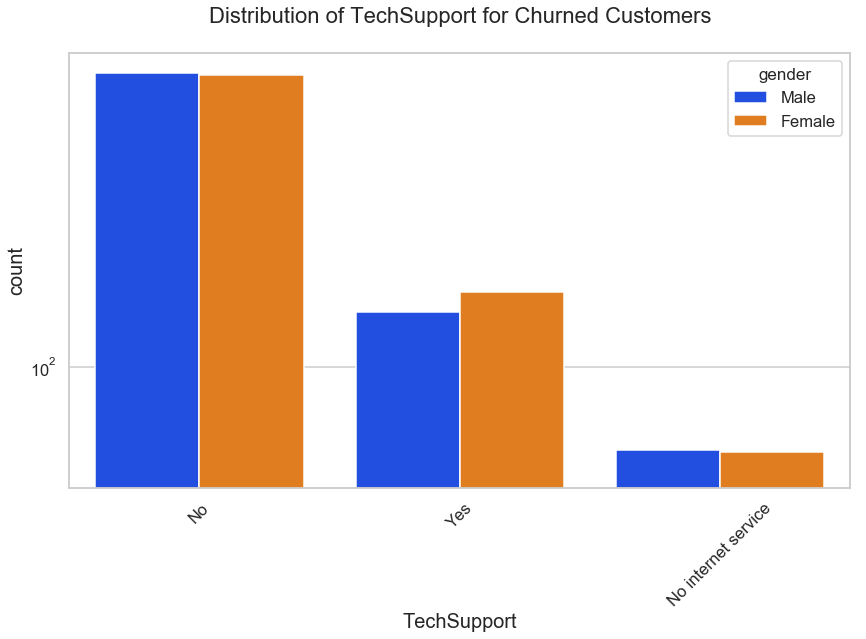

In [ ]:
uniplot(edaTarget1, col='SeniorCitizen', title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

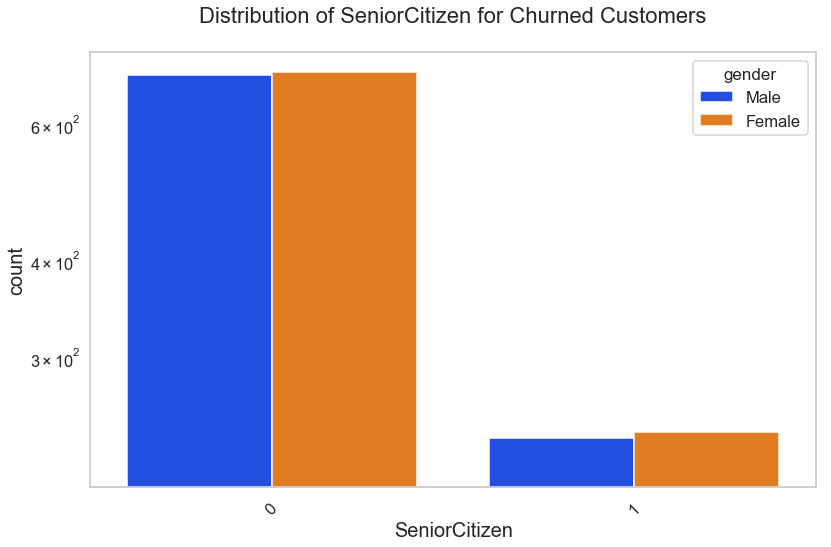

In [82]:
edaCopiedDataDummies.to_csv('tel_churn2.csv')

# Key Findings

- Customers with month-to-month contracts exhibit higher churn rates.
- Lack of online security and technical support services are associated with higher churn.
- Customers in their first year of subscription are more likely to churn.
- Fiber optics internet service subscribers have higher churn rates.
- Non-senior citizens tend to have higher churn rates compared to senior citizens.
- Customers using electronic check as a payment method have the highest churn rates.
- Churn tends to be higher when monthly charges are high, particularly when combined with lower tenure and total charges.